In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# import mglearn
import numpy as np
import pandas as pd

In [3]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
#### feature를 컬럼으로 DataFrame 생성
data_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)

data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [4]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.2)
## RandomForestClassifier 모델 생성. 결정트리갯수는 100
rf = RandomForestClassifier(bootstrap=True,n_estimators=100)
## 학습시킴
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [9]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함

print('Training DataSet Accuracy: ',rf.score(X_train,y_train))
print('Test DataSet Accuracy: ',rf.score(X_test,y_test))

Training DataSet Accuracy:  1.0
Test DataSet Accuracy:  0.9298245614035088


In [11]:
rf = RandomForestClassifier(bootstrap=True,n_estimators=100,max_features=2)
rf.fit(X_train,y_train)

print('Max_features - Training DataSet Accuracy: ',rf.score(X_train,y_train))
print('Max_features - Test DataSet Accuracy: ',rf.score(X_test,y_test))

Max_features - Training DataSet Accuracy:  1.0
Max_features - Test DataSet Accuracy:  0.956140350877193


In [12]:
rf = RandomForestClassifier(bootstrap=True,n_estimators=100,max_depth=5)
rf.fit(X_train,y_train)

print('max_depth - Training DataSet Accuracy: ',rf.score(X_train,y_train))
print('max_depth - Test DataSet Accuracy: ',rf.score(X_test,y_test))

max_depth - Training DataSet Accuracy:  0.9956043956043956
max_depth - Test DataSet Accuracy:  0.9473684210526315


In [14]:
print('특성 중요도:\n{}'.format(rf.feature_importances_))

특성 중요도:
[0.06451502 0.00968613 0.05924913 0.04778225 0.00914025 0.01227517
 0.03441248 0.07751109 0.00430199 0.00317395 0.01430789 0.0041096
 0.01491333 0.01684367 0.00374578 0.00748524 0.00467348 0.00826956
 0.00332443 0.00430223 0.10478523 0.01374268 0.15089925 0.14608292
 0.01540881 0.02039935 0.02021232 0.1133591  0.00774668 0.00334099]


In [65]:
cancer.data.shape

(569, 30)

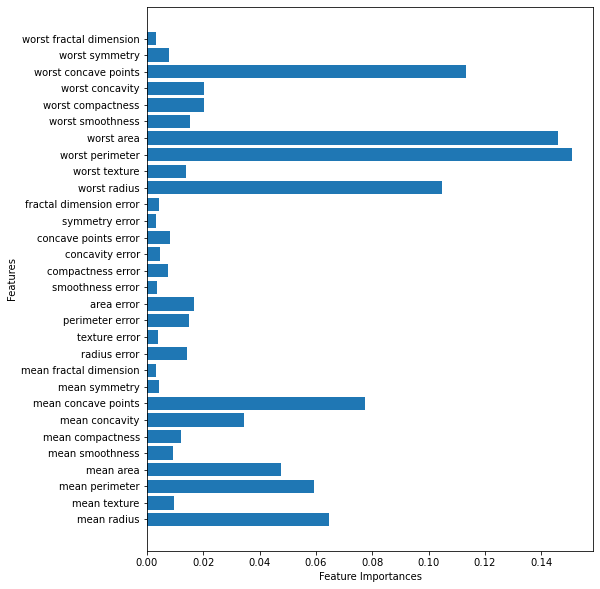

In [45]:
n_feature = cancer.data.shape[1]
plt.figure(figsize=(8,10))
plt.barh(range(n_feature),rf.feature_importances_,align='center')
plt.yticks(np.arange(n_feature),cancer.feature_names)
plt.xlabel('Feature Importances')
plt.ylabel('Features')

plt.show()

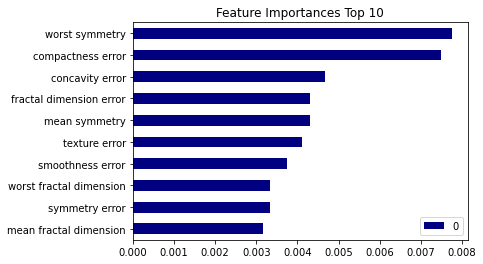

In [141]:
importance = rf_df.sort_values(by=0,ascending=True).head(10)
importance.plot(kind='barh',colormap='jet')
plt.title('Feature Importances Top 10')
plt.yticks(np.arange(len(importance.index)),importance.index)
plt.show()

In [142]:
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자
max_dept = [1,3,4,6,10,15]
for i in max_dept:
    rf = RandomForestClassifier(bootstrap=True,n_estimators=100,max_depth=i)
    rf.fit(X_train,y_train)
    print('max_depth=',i,' 정확도 : ',rf.score(X_train,y_train))



max_depth= 1  정확도 :  0.9384615384615385
max_depth= 3  정확도 :  0.9802197802197802
max_depth= 4  정확도 :  0.9934065934065934
max_depth= 6  정확도 :  0.9978021978021978
max_depth= 10  정확도 :  1.0
max_depth= 15  정확도 :  1.0
